In [29]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load Data Using Pandas

In [30]:
df = pd.read_csv('data/kc_house_data.csv')

In [31]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [33]:
df.duplicated().sum()
df.loc[df.duplicated() == True]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [34]:
df.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [35]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861


In [36]:
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [37]:
df = df.dropna()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [38]:
len(df)

30111

In [39]:
categoricals = df.select_dtypes("object")

for col in categoricals:
    print(df[col].value_counts(), "\n")

7/1/2021      196
8/2/2021      186
7/6/2021      176
6/23/2021     176
6/16/2021     174
             ... 
12/5/2021       1
1/16/2022       1
6/9/2022        1
12/26/2021      1
12/25/2021      1
Name: date, Length: 365, dtype: int64 

NO     29600
YES      511
Name: waterfront, dtype: int64 

NO     29339
YES      772
Name: greenbelt, dtype: int64 

NO     24862
YES     5249
Name: nuisance, dtype: int64 

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64 

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64 

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64 

Gas                  20576
Electric

# Highly Correlated Predictor

In [40]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
long            -0.022278
id              -0.034096
Name: price, dtype: float64

In [41]:
y = df['price']
X = pd.DataFrame(df['sqft_living'])

# Plotting the Predictor v Price

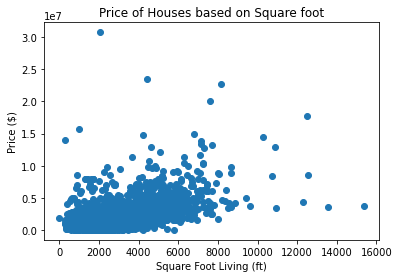

In [42]:
fig, ax = plt.subplots()
ax.scatter(X,y); 

ax.set_xlabel('Square Foot Living (ft)')
ax.set_ylabel('Price ($)')
ax.set_title('Price of Houses based on Square foot')

plt.show()

# SImple Linear Regression

In [43]:
baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()

In [44]:
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:23:27   Log-Likelihood:            -4.4847e+05
No. Observations:               30111   AIC:                         8.969e+05
Df Residuals:                   30109   BIC:                         8.970e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.559e+04   9798.815     -7.714      0.000   -9.48e+04   -5.64e+04
sqft_living   560.5134      4.211    133.096      0.000     552.259     568.768
==============================================================================
Omnibus:                    43384.874   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47187801.072
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.242   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
from sklearn.metrics import mean_absolute_error

baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X)))
baseline_mae

396271.44573723007

- The resulting value of 'baseline_mae' is 389202.06448781595, which represents the average absolute difference between the true values and the predicted values. This means that on average, the predicted values from the baseline model differ from the true values by about 389202.06448781595 units.

- It's important to note that the interpretation of this value depends on the scale of the target variable y and the specific problem you are working on. Generally, a lower MAE indicates better model performance, but the magnitude of the error also needs to be evaluated in the context of the problem and the data.

The output shows the results of a simple linear regression model. The dependent variable is the price of the houses.
The independent variable is the square footage of living space.

- The R-squared value of 0.370 indicates that approximately 37% of the variance in the housing price can be explained by the square footage of living space. The adjusted R-squared value is the same, indicating that there is only one independent variable in the model.

- The coefficient for the square footage of living space is 560.5134, meaning that is the change in the housing price for a one-unit increase in square footage of living space.

- The t-value for the square footage of living space is 133.096, which is statsiticallyh significant at the 5% level since the p-value is less than 0.05.

- The high condition number, 5.56e^3, suggests that there may be strong collinearity or other numerical problems in the model. 

# Multiple Linear Regressions

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [47]:
df = df.drop(columns=['id', 'date', 'address', 'lat', 'long'])
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0
30151,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0
30152,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0
30153,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0


In [48]:
df = pd.get_dummies(df, columns=['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade', 'heat_source', 'sewer_system'])

In [50]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,...,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
0,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,...,0,1,0,0,0,0,0,0,1,0
1,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,...,0,0,0,1,0,0,0,0,1,0
2,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,...,0,1,0,0,0,0,0,0,1,0
3,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,...,0,1,0,0,0,0,0,0,1,0
4,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,...,0,0,0,1,0,0,0,0,1,0
30151,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,520,...,0,1,0,0,0,0,0,0,1,0
30152,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,...,0,1,0,0,0,0,0,0,1,0
30153,775000.0,3,2.5,2570,2889,2.0,1830,740,480,100,...,0,1,0,0,0,0,0,0,1,0


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df['price'], test_size=0.3, random_state=0)

In [55]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     563.7
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:31:56   Log-Likelihood:            -3.1038e+05
No. Observations:               21077   AIC:                         6.208e+05
Df Residuals:                   21034   BIC:                         6.212e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.856e+06   1.35e+05     13.710      0.000    1.59e+06    2.12e+06
bedrooms                        -5.381e+04   6065.921     -8.871      0.000   -6.57e+04   -4.19e+04
bathrooms                        8.218e+04   8615.252      9.539      0.000    6.53e+04    9.91e+04
sqft_living                        96.3934     19.819      4.864      0.000      57.546     135.241
sqft_lot                            0.3309      0.073      4.513      0.000       0.187       0.475
floors                          -5.239e+04   1.08e+04     -4.855      0.000   -7.35e+04   -3.12e+04
sqft_above                        213.2025     20.127     10.593      0.000     173.753     252.652
sqft_basement                     141.2061     14.962      9.438      0.000     111.880     170.532
sqft_garage                      -159.9504     20.873     -7.663      0.000    -200.863    -119.038
sqft_patio                        142.9995     19.729      7.248      0.000     104.329     181.670
yr_built                        -2480.2948    218.617    -11.345      0.000   -2908.800   -2051.789
yr_renovated                       56.8979     10.906      5.217      0.000      35.521      78.275
waterfront_NO                    6.058e+05   6.99e+04      8.671      0.000    4.69e+05    7.43e+05
waterfront_YES                   1.251e+06   7.09e+04     17.630      0.000    1.11e+06    1.39e+06
greenbelt_NO                     9.319e+05   6.82e+04     13.666      0.000    7.98e+05    1.07e+06
greenbelt_YES                    9.246e+05   6.98e+04     13.239      0.000    7.88e+05    1.06e+06
nuisance_NO                      8.962e+05   6.83e+04     13.126      0.000    7.62e+05    1.03e+06
nuisance_YES                     9.602e+05   6.76e+04     14.207      0.000    8.28e+05    1.09e+06
view_AVERAGE                     2.413e+05   3.27e+04      7.390      0.000    1.77e+05    3.05e+05
view_EXCELLENT                   8.516e+05   4.07e+04     20.903      0.000    7.72e+05    9.31e+05
view_FAIR                        3.088e+05   4.95e+04      6.243      0.000    2.12e+05    4.06e+05
view_GOOD                        2.624e+05   3.56e+04      7.381      0.000    1.93e+05    3.32e+05
view_NONE                        1.923e+05   3.17e+04      6.064      0.000     1.3e+05    2.55e+05
condition_Average                 3.96e+05   3.64e+04     10.886      0.000    3.25e+05    4.67e+05
condition_Fair                   3.256e+05   5.18e+04      6.281      0.000    2.24e+05    4.27e+05
condition_Good                   4.293e+05   3.43e+04     12.520      0.000    3.62e+05    4.96e+05
condition_Poor                   2.111e+05   8.03e+04      2.629      0.009    5.37e+04    3.69e+05
condition_Very Good              4.945e+05   3.43e+04     14.418      0.000    4.27

In [57]:
y_pred = model.predict(sm.add_constant(X_test))
y_pred

14354    2.002325e+06
17943    1.400151e+06
14413    1.197280e+06
22904    2.253377e+06
21568    8.832866e+05
             ...     
11464    3.935339e+06
16846    9.278546e+05
5929     1.260654e+06
27913    8.827302e+05
25536    1.032357e+06
Length: 9034, dtype: float64

In [56]:
df["condition"] = df["condition"].astype(str)

KeyError: 'condition'

In [ ]:
    df_1["condition"] = df_1["condition"].replace({"Poor": 0,
                                                "Fair": 1,
                                                 "Average": 2,
                                                 "Good": 3,
                                                 "Very Good": 4,})

In [ ]:
df_1["grade"] = df_1["grade"].astype(str)


In [ ]:
   df_1["grade"] = df_1["grade"].replace({"Substandard": 0,
                                         "Poor": 1,
                                         "Low": 2,
                                         "Fair": 3,
                                         "Low Average": 4,
                                         "Average": 5,
                                         "Good": 6,
                                         "Better": 7,
                                         "Very Good": 8,
                                         "Excellent": 9,
                                         "Luxury": 10,
                                         "Mansion": 11})

In [ ]:
X_1 = df_1[['grade', 'bedrooms', 'condition']]
y1 = df_1['price']

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].bar(X_1['grade'], y1)
axs[0].set_xlabel('Grade')
axs[0].set_ylabel('Price ($)')
axs[0].set_title('Price based on Grade of House') 
axs[0].set_xticks(range(12))
axs[0].set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])

axs[1].bar(X_1['bedrooms'], y1)
axs[1].set_xlabel('Bedrooms')
axs[1].set_ylabel('Price ($)')
axs[1].set_title('Price based on Number of Bedrooms')

axs[2].bar(X_1['condition'], y1)
axs[2].set_xlabel('Condition')
axs[2].set_ylabel('Price ($)')
axs[2].set_title('Price based on Condition of House')
axs[2].set_xticks(range(5))
axs[2].set_xticklabels(['0', '1', '2', '3', '4'])


plt.show()

In [ ]:
X_iterated = df_1[['price', 'condition']]
X_iterated

In [ ]:
X_iterated = pd.get_dummies(X_iterated, columns=['condition'])
X_iterated

In [ ]:
assert type(X_iterated) == pd.DataFrame

valid_col_nums = df_1.select_dtypes("object").nunique() + 1

assert X_iterated.shape[1] in valid_col_nums.values

In [ ]:
X_iterated.drop("condition_0", axis=1, inplace=True)
X_iterated

In [ ]:
assert X_iterated.shape[1] in (valid_col_nums - 1).values

In [ ]:
X_iterated

In [ ]:
X

In [ ]:
X1 = pd.concat([X_iterated, X], axis=1)

In [ ]:
X1

In [ ]:
X2 = X1[['condition_1', 'condition_2', 'condition_3', 'condition_4', 'sqft_living']]

In [ ]:
X3 = sm.add_constant(X2)
y1 = df_1['price']

mult_lin_model = sm.OLS(y1,X3).fit()

mult_lin_model.summary()